In [1]:
import pandas as pd
import numpy as np
import re

# text processing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# visualization
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# metrics
from sklearn.metrics import classification_report, confusion_matrix

# time
import time

# warnings
import warnings
warnings.filterwarnings('ignore')

# save model
import pickle

print('installed')

installed


In [2]:
# stopword set
import nltk

stopwordEng = set(stopwords.words('english'))

In [3]:
print('Stop List:\n', stopwordEng)

Stop List:
 {'yours', 'and', 'should', "weren't", 'up', 'her', 'as', 'more', "hasn't", 'only', 'of', "shan't", "don't", 'won', 'hadn', 'some', 'into', 'hers', 'because', 'in', 'couldn', 'own', 'weren', 'our', 'do', "she's", 'the', 'after', 'very', 's', "it's", 'under', 'through', 'you', 'an', "hadn't", 'needn', 'he', 'all', 've', 'so', "you'll", 'until', 'mustn', 'wasn', 'we', 'did', 'is', 'about', 'ourselves', 'its', 'yourself', 'themselves', 'by', 'these', 'doesn', 'was', "wasn't", 'theirs', 'which', "aren't", "couldn't", "haven't", 'for', 'ma', 'ain', 'aren', 'again', 'it', "needn't", 'will', 'now', 'd', 'on', "mustn't", 'me', 'isn', 'over', 'wouldn', 'if', 'here', 'my', 'yourselves', 'whom', 'who', 'same', 'from', "doesn't", 'don', 'him', 'can', 'just', 'his', 'ours', 'while', 'll', 'out', 'no', "you're", 'your', 'had', 'how', 'himself', 'have', "isn't", 'with', 'most', "won't", 'haven', 'are', 'to', "should've", 'but', 'be', 'this', 'between', 'at', 'than', 'herself', 'what', 'y',

## Loading dataset

In [117]:
column_names=['sentiment','ids','date','flag','user','tweet']
data=pd.read_csv('twitter_dataset.csv', names=column_names, encoding='ISO-8859-1')

In [118]:
data.head()

,sentiment,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
data.sample(5)

,sentiment,ids,date,flag,user,tweet
614493,0,2225915234,Thu Jun 18 11:18:13 PDT 2009,NO_QUERY,christinenstone,@skovall omg i wish i was there!!!!
1272931,4,2000776980,Mon Jun 01 22:56:15 PDT 2009,NO_QUERY,twilightshawty,did a cooking show today.... who wants the re...
655507,0,2239975782,Fri Jun 19 09:11:19 PDT 2009,NO_QUERY,NikFreeman,@B_M_R wtf!? On my way to philly!!!! On the nj...
1463595,4,2064148393,Sun Jun 07 05:23:05 PDT 2009,NO_QUERY,toootsies,@Gailporter still growing love you gailies.
973842,4,1833236522,Sun May 17 22:40:37 PDT 2009,NO_QUERY,denisedahlin,@WillySantos just asked about the delivery cha...


In [7]:
data.columns

Index(['sentiment', 'ids', 'date', 'flag', 'user', 'tweet'], dtype='object')

In [10]:
len(data), data.shape

(1600000, (1600000, 6))

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   ids        1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   tweet      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [12]:
print(data.dtypes)

sentiment     int64
ids           int64
date         object
flag         object
user         object
tweet        object
dtype: object


In [13]:
data.isnull().sum()

sentiment    0
ids          0
date         0
flag         0
user         0
tweet        0
dtype: int64

In [14]:
print("no. of unique values of the target variable: {}".format(data['sentiment'].nunique()))
print("unique values of target variable are {0} and {1}".format(data['sentiment'].unique()[0],data['sentiment'].unique()[1]))

no. of unique values of the target variable: 2
unique values of target variable are 0 and 4


#### 0 - Negetive
#### 4 - Positive

In [16]:
data['ids'].nunique()

1598315

In [17]:
data['user'].nunique()

659775

In [18]:
data['tweet'].nunique()

1581466

In [19]:
data.duplicated().sum()

0

sentiment
0    800000
4    800000
Name: count, dtype: int64


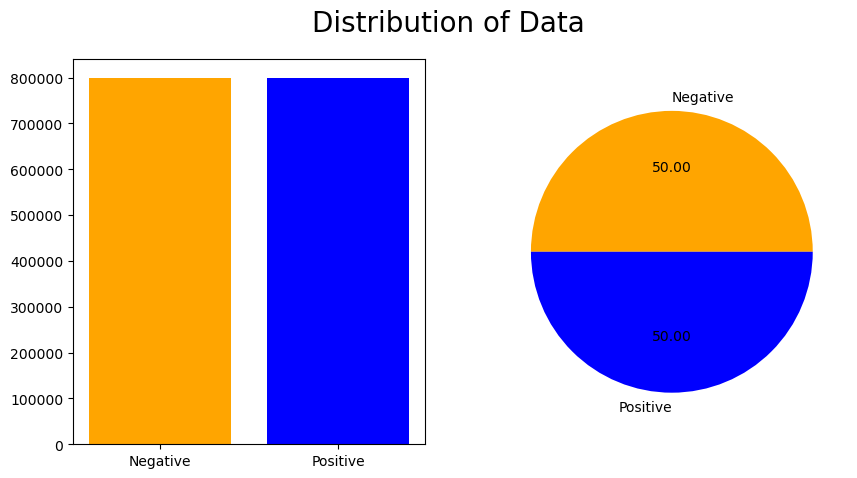

In [27]:
val_cnts = data['sentiment'].value_counts()
print(val_cnts)

f, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].bar(['Negative', 'Positive'], val_cnts, color=['orange', 'blue'])

axis[1].pie(val_cnts, labels=['Negative', 'Positive'], autopct='%0.2f', colors=['orange', 'blue'])
f.suptitle('Distribution of Data', fontsize=20)
plt.show()

## Text preprocessing

In [29]:
data=data[['sentiment','tweet']]
data.shape

(1600000, 2)

In [32]:
data.replace({'sentiment':{4:1}}, inplace=True)
data.sample(5)

,sentiment,tweet
1594994,1,Turning on computer. Then gonna put dailybooth...
827370,1,One of the greatest days of my life. thanks @S...
544946,0,"@scenariogirl I live 5 minutes from dural, but..."
1044308,1,Heh. Be off later.
748655,0,I'm at a loss as to what to do. Losing my bags...


#### 0 - Negetive
#### 1 - Positive

In [33]:
stemmer = PorterStemmer()

url = r'((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)'
user = r'@[^\s]+'
alpha = r'[^a-zA-Z]'
seq = r'(.)\1\1+'
seqReplace = r'\1\1'

In [34]:
def preprocessData(text):
    # lowercasing
    text = text.lower()

    # removing URL's
    text = re.sub(url, ' ', text)

    # removing mentions @USER
    text = re.sub(user, ' ', text)

    # remove all non alphabets
    text = re.sub(alpha, ' ', text)

    # replace more than 2 consecutive letters by 2 letters
    text = re.sub(seq, seqReplace, text)

    # remove extra whitespaces
    text = text.strip()
    text = re.sub(r' +', ' ', text)

    tokens = []

    for word in word_tokenize(text):
        tokens.append(stemmer.stem(word))   # stemming

    return ' '.join(tokens)

In [35]:
data.loc[100, 'tweet']

' Body Of Missing Northern Calif. Girl Found: Police have found the remains of a missing Northern California girl .. http://tr.im/imji'

In [36]:
preprocessData(data.loc[100, 'tweet'])

'bodi of miss northern calif girl found polic have found the remain of a miss northern california girl'

In [37]:
data.loc[145300, 'tweet']

"I'm so bored...  I'm going to read some book. But I can't decide which (:"

In [41]:
preprocessData(data.loc[145300, 'tweet'])

'i m so bore i m go to read some book but i can t decid which'

In [42]:
data.loc[856762, 'tweet']

'just had lime cous-cous with @SarahMoran and @Ehon at my place '

In [43]:
preprocessData(data.loc[856762, 'tweet'])

'just had lime cou cou with and at my place'

In [45]:
data['newTweet'] = data['tweet'].apply(preprocessData)
print('Data preprocessing completed successfully')

Data preprocessing completed successfully


In [48]:
data.sample(5)

,sentiment,tweet,newTweet
478389,0,@Alyssa_Milano yup the Magic blew ti for sure,yup the magic blew ti for sure
1290813,1,Popping out to lunch. Out into the sunshine,pop out to lunch out into the sunshin
1109525,1,Finally a beautiful day in FL...*knock on wood...,final a beauti day in fl knock on wood poolsid...
1369231,1,"@aubriss , 24 DAYS, -screams with exitement.",day scream with exit
421567,0,@Chrisrider in mililani? thats long time ago,in mililani that long time ago


In [49]:
# removing duplicate transformed tweets
print("no. unique values of the newTweet: {}".format(data['newTweet'].nunique()))
print("no. of rows in dataframe: {}".format(len(data)))
print("no. of duplicated rows in dataframe: {}".format(len(data)-data['newTweet'].nunique()))

no. unique values of the newTweet: 1515614
no. of rows in dataframe: 1600000
no. of duplicated rows in dataframe: 84386


In [50]:
# Removing duplicate rows but keeping first duplicate
data=data.drop_duplicates(subset='newTweet', keep='first')

In [51]:
# checking if duplicates have been removed
print("no. unique values of the newTweet: {}".format(data['newTweet'].nunique()))
print("no. of rows in dataframe: {}".format(len(data)))
print("no. of duplicated rows in dataframe: {}".format(len(data)-data['newTweet'].nunique()))

no. unique values of the newTweet: 1515614
no. of rows in dataframe: 1515614
no. of duplicated rows in dataframe: 0


## Data visualization and preprocessing

In [52]:
data.shape

(1515614, 3)

#### For Negetive Sentiment

[]

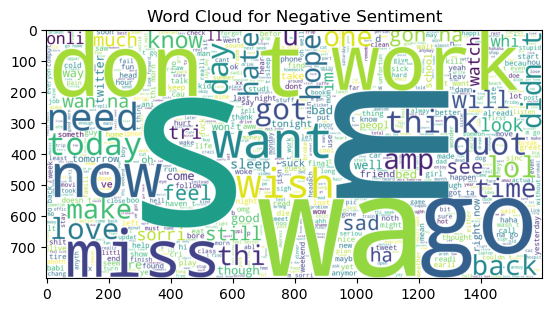

In [53]:
wc = WordCloud(max_words=1500,width=1600, height=800, min_font_size=10, background_color='white')

negWC = wc.generate(data[data['sentiment']==0]['newTweet'].str.cat(sep=' '))
plt.imshow(negWC)
plt.title('Word Cloud for Negative Sentiment')
plt.plot()

In [55]:
# most common 30 words in -ve tweets
negWords = nltk.FreqDist(w for t in data[data['sentiment']==0]['newTweet'] for w in t.split())
negWords.most_common(30)

[('i', 563626),
 ('to', 308863),
 ('the', 255629),
 ('my', 187341),
 ('it', 180851),
 ('a', 180702),
 ('and', 152997),
 ('is', 125889),
 ('t', 123962),
 ('in', 114639),
 ('you', 100956),
 ('for', 98036),
 ('of', 92070),
 ('s', 90922),
 ('have', 90721),
 ('me', 89400),
 ('so', 86168),
 ('that', 85097),
 ('but', 84455),
 ('on', 83490),
 ('go', 77873),
 ('m', 77050),
 ('not', 75257),
 ('be', 68176),
 ('just', 63510),
 ('at', 61711),
 ('get', 61017),
 ('wa', 58867),
 ('work', 56308),
 ('can', 53636)]

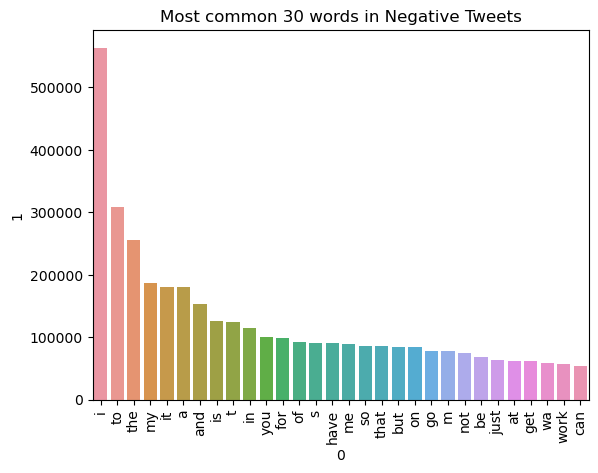

In [56]:
sns.barplot(x=pd.DataFrame(negWords.most_common(30))[0], y=pd.DataFrame(negWords.most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title("Most common 30 words in Negative Tweets")
plt.show()

#### For Positive Sentiment

[]

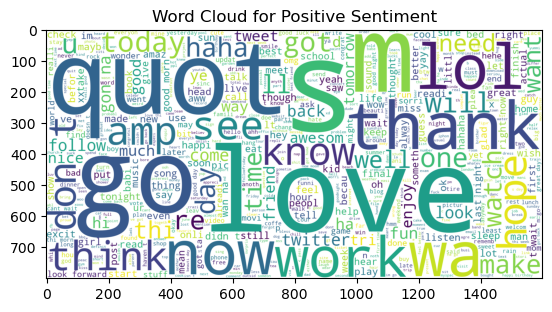

In [57]:
posWC = wc.generate(data[data['sentiment']==1]['newTweet'].str.cat(sep=' '))
plt.imshow(posWC)
plt.title('Word Cloud for Positive Sentiment')
plt.plot()

In [58]:
# most common 30 words in +ve tweets
posWords = nltk.FreqDist(w for t in data[data['sentiment']==1]['newTweet'] for w in t.split())
posWords.most_common(30)

[('i', 376169),
 ('the', 259456),
 ('to', 247785),
 ('a', 195387),
 ('you', 186684),
 ('it', 163936),
 ('and', 148171),
 ('my', 124256),
 ('for', 113810),
 ('is', 106714),
 ('in', 99856),
 ('s', 95450),
 ('of', 89936),
 ('that', 86412),
 ('on', 81307),
 ('me', 69946),
 ('have', 68444),
 ('with', 64395),
 ('so', 64395),
 ('just', 61767),
 ('be', 59783),
 ('good', 59602),
 ('m', 59583),
 ('love', 59307),
 ('go', 58208),
 ('t', 57159),
 ('day', 53221),
 ('at', 48673),
 ('but', 48033),
 ('get', 47131)]

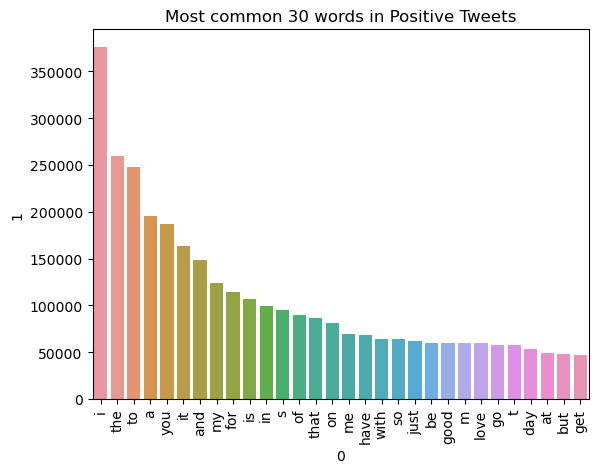

In [60]:
sns.barplot(x=pd.DataFrame(posWords.most_common(30))[0], y=pd.DataFrame(posWords.most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title("Most common 30 words in Positive Tweets")
plt.show()

## Model Training

In [63]:
X = data['newTweet'].values
Y = data['sentiment'].values

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=7)

In [69]:
def modelEvaluation(model, test):
    # prediction for test data
    predictions = model.predict(test)

    # print evaluation metrics
    print(classification_report(y_test, predictions))

    # display confusion matrix
    cf = confusion_matrix(y_test, predictions)
    categories = ['Negative', 'Positive']
    groupNames = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    groupPercentages = ['{0:.2%}'.format(value) for value in cf.flatten() / np.sum(cf)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(groupNames, groupPercentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cf, annot=labels, cmap='Blues', fmt='', xticklabels=categories, yticklabels=categories)
    plt.xlabel('Predicted Values', fontdict = {'size':14})
    plt.ylabel('Actual Values', fontdict = {'size':14})
    plt.title('Confusion Matrix', fontdict = {'size':18})
    plt.show()

In [101]:
Model_Stats_cols=['ID','Text Extraction','ML Model','Accuracy','f1-score (class-0)','f1-score (class-1)','Training Time (sec)']
Model_Stats=pd.DataFrame(columns=Model_Stats_cols)

#### CountVectorizer

In [67]:
# transforming train & test data using CountVectorizer
cv = CountVectorizer(ngram_range=(1,2), max_features=500000)
start = time.time()
x_train_cv = cv.fit_transform(x_train)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
x_test_cv = cv.transform(x_test)

Training time = 53.37 seconds



Training time = 0.79 seconds

              precision    recall  f1-score   support

           0       0.81      0.78      0.79    115092
           1       0.78      0.81      0.79    112251

    accuracy                           0.79    227343
   macro avg       0.79      0.79      0.79    227343
weighted avg       0.79      0.79      0.79    227343



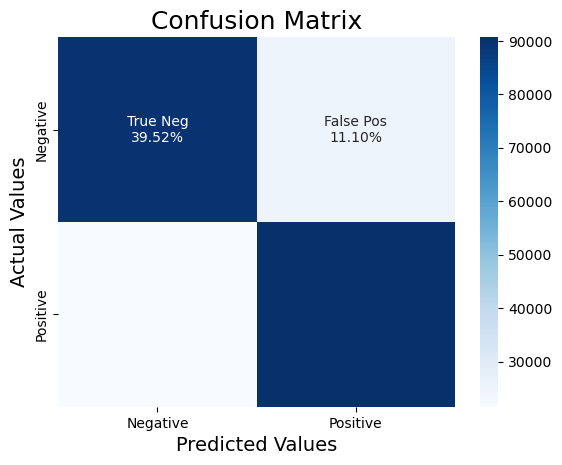

In [70]:
# model-1: Bernoulli Naive Bayes with CountVectorizer
bnbCV = BernoulliNB()
start = time.time()
bnbCV.fit(x_train_cv, y_train)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
modelEvaluation(bnbCV, x_test_cv)

In [103]:
new_row=pd.DataFrame([['Model 1','CountVectorizer','BernoulliNB',0.79,0.79,0.79,0.79]], columns=Model_Stats_cols)
Model_Stats=pd.concat([Model_Stats, new_row], ignore_index=True)

Training time = 0.59 seconds

              precision    recall  f1-score   support

           0       0.79      0.80      0.80    115092
           1       0.80      0.79      0.79    112251

    accuracy                           0.80    227343
   macro avg       0.80      0.80      0.80    227343
weighted avg       0.80      0.80      0.80    227343



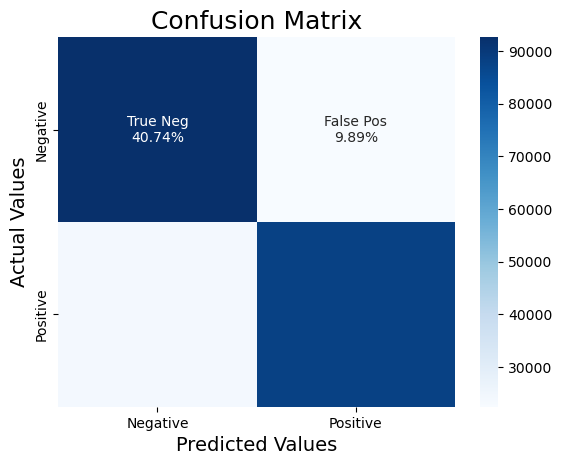

In [72]:
# model-2: Multinomial Naive Bayes with CountVectorizer
mnbCV = MultinomialNB()
start = time.time()
mnbCV.fit(x_train_cv, y_train)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
modelEvaluation(mnbCV, x_test_cv)

In [106]:
new_row=pd.DataFrame([['Model 2','CountVectorizer','MultinomialNB',0.80,0.80,0.79,0.59]], columns=Model_Stats_cols)
Model_Stats=pd.concat([Model_Stats, new_row], ignore_index=True)

Training time = 310.79 seconds

              precision    recall  f1-score   support

           0       0.82      0.79      0.80    115092
           1       0.79      0.82      0.81    112251

    accuracy                           0.80    227343
   macro avg       0.80      0.80      0.80    227343
weighted avg       0.81      0.80      0.80    227343



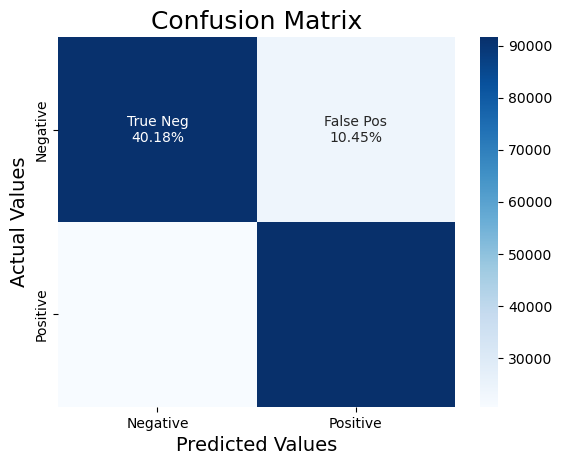

In [74]:
# model-3: Logistic Regression with CountVectorizer
lrCV = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
start = time.time()
lrCV.fit(x_train_cv, y_train)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
modelEvaluation(lrCV, x_test_cv)

In [107]:
new_row=pd.DataFrame([['Model 3','CountVectorizer','LogisticRegression',0.80,0.80,0.81,310.79]], columns=Model_Stats_cols)
Model_Stats=pd.concat([Model_Stats, new_row], ignore_index=True)

Training time = 523.82 seconds

              precision    recall  f1-score   support

           0       0.79      0.77      0.78    115092
           1       0.77      0.79      0.78    112251

    accuracy                           0.78    227343
   macro avg       0.78      0.78      0.78    227343
weighted avg       0.78      0.78      0.78    227343



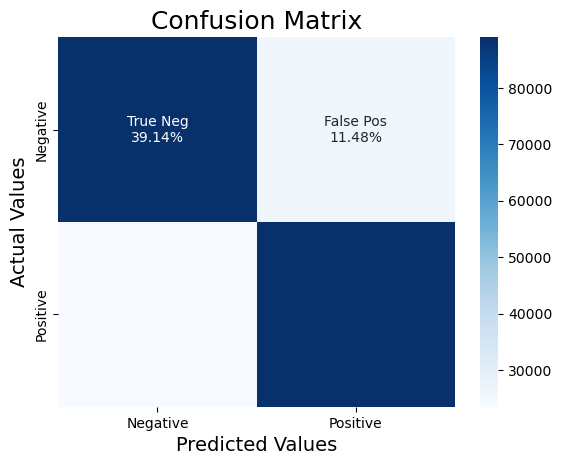

In [75]:
# model-4: Linear SVC with CountVectorizer
svcCV = LinearSVC()
start = time.time()
svcCV.fit(x_train_cv, y_train)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
modelEvaluation(svcCV, x_test_cv)

In [108]:
new_row=pd.DataFrame([['Model 4','CountVectorizer','LinearSVC',0.78,0.78,0.78,523.82]], columns=Model_Stats_cols)
Model_Stats=pd.concat([Model_Stats, new_row], ignore_index=True)

#### TfidfVectorizer

In [76]:
# transforming train & test data using TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
start = time.time()
x_train_tf = tfidf.fit_transform(x_train)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
x_test_tf = tfidf.transform(x_test)

Training time = 60.42 seconds



Training time = 0.81 seconds

              precision    recall  f1-score   support

           0       0.81      0.78      0.79    115092
           1       0.78      0.81      0.79    112251

    accuracy                           0.79    227343
   macro avg       0.79      0.79      0.79    227343
weighted avg       0.79      0.79      0.79    227343



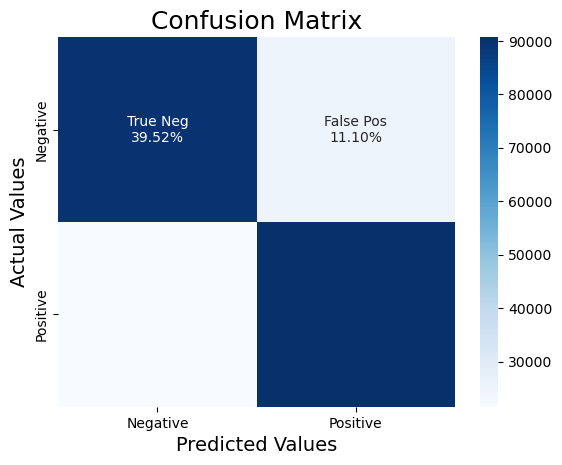

In [77]:
# model-5: Bernoulli Naive Bayes with TfidfVectorizer
bnbTF = BernoulliNB()
start = time.time()
bnbTF.fit(x_train_tf, y_train)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
modelEvaluation(bnbTF, x_test_tf)

In [111]:
new_row=pd.DataFrame([['Model 5','TfidfVectorizer','BernoulliNB',0.79,0.79,0.79,0.81]], columns=Model_Stats_cols)
Model_Stats=pd.concat([Model_Stats, new_row], ignore_index=True)

Training time = 0.51 seconds

              precision    recall  f1-score   support

           0       0.79      0.81      0.80    115092
           1       0.80      0.78      0.79    112251

    accuracy                           0.80    227343
   macro avg       0.80      0.80      0.80    227343
weighted avg       0.80      0.80      0.80    227343



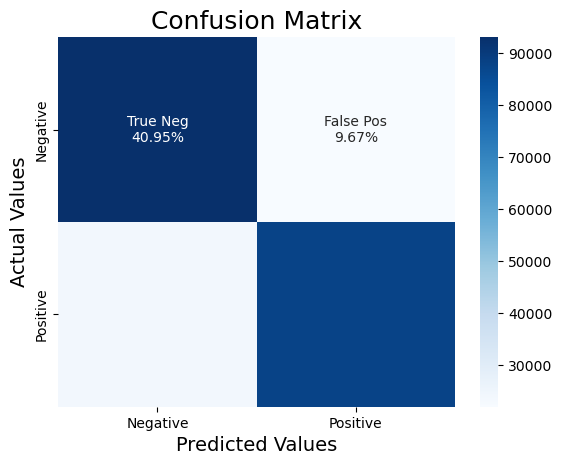

In [78]:
# model-6: Multinomial Naive Bayes with TfidfVectorizer
mnbTF = MultinomialNB()
start = time.time()
mnbTF.fit(x_train_tf, y_train)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
modelEvaluation(mnbTF, x_test_tf)

In [112]:
new_row=pd.DataFrame([['Model 6','TfidfVectorizer','MultinomialNB',0.80,0.80,0.79,0.51]], columns=Model_Stats_cols)
Model_Stats=pd.concat([Model_Stats, new_row], ignore_index=True)

Training time = 162.30 seconds

              precision    recall  f1-score   support

           0       0.83      0.81      0.82    115092
           1       0.81      0.83      0.82    112251

    accuracy                           0.82    227343
   macro avg       0.82      0.82      0.82    227343
weighted avg       0.82      0.82      0.82    227343



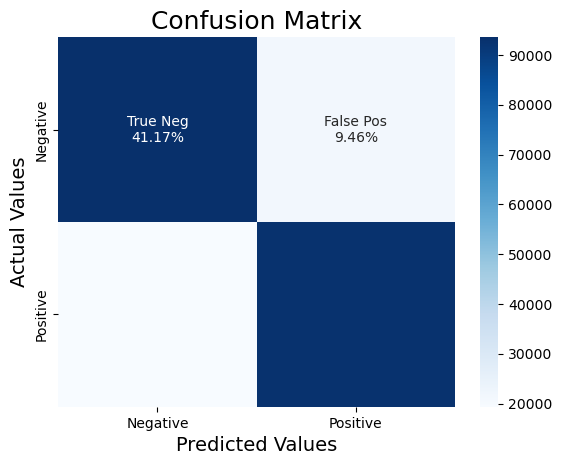

In [79]:
# model-7: Logistic Regression with TfidfVectorizer
lrTF = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
start = time.time()
lrTF.fit(x_train_tf, y_train)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
modelEvaluation(lrTF, x_test_tf)

In [113]:
new_row=pd.DataFrame([['Model 7','TfidfVectorizer','LogisticRegression',0.82,0.82,0.82,162.30]], columns=Model_Stats_cols)
Model_Stats=pd.concat([Model_Stats, new_row], ignore_index=True)

Training time = 37.49 seconds

              precision    recall  f1-score   support

           0       0.82      0.80      0.81    115092
           1       0.80      0.82      0.81    112251

    accuracy                           0.81    227343
   macro avg       0.81      0.81      0.81    227343
weighted avg       0.81      0.81      0.81    227343



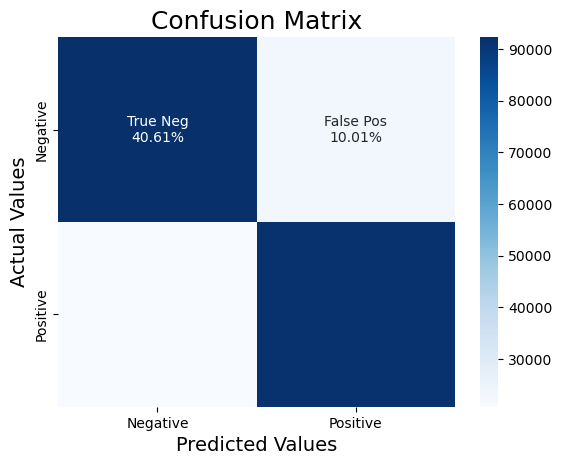

In [80]:
# model-8: Linear SVC with TfidfVectorizer
svcTF = LinearSVC()
start = time.time()
svcTF.fit(x_train_tf, y_train)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
modelEvaluation(svcTF, x_test_tf)

In [114]:
new_row=pd.DataFrame([['Model 8','TfidfVectorizer','LinearSVC',0.81,0.81,0.81,37.49]], columns=Model_Stats_cols)
Model_Stats=pd.concat([Model_Stats, new_row], ignore_index=True)

## Saving the model

In [115]:
Model_Stats

,ID,Text Extraction,ML Model,Accuracy,f1-score (class-0),f1-score (class-1),Training Time (sec)
0,Model 1,CountVectorizer,BernoulliNB,0.79,0.79,0.79,0.79
1,Model 2,CountVectorizer,MultinomialNB,0.80,0.80,0.79,0.59
2,Model 3,CountVectorizer,LogisticRegression,0.80,0.80,0.81,310.79
3,Model 4,CountVectorizer,LinearSVC,0.78,0.78,0.78,523.82
4,Model 5,TfidfVectorizer,BernoulliNB,0.79,0.79,0.79,0.81
5,Model 5,TfidfVectorizer,BernoulliNB,0.79,0.79,0.79,0.81
6,Model 6,TfidfVectorizer,MultinomialNB,0.80,0.80,0.79,0.51
7,Model 7,TfidfVectorizer,LogisticRegression,0.82,0.82,0.82,162.30
8,Model 8,TfidfVectorizer,LinearSVC,0.81,0.81,0.81,37.49


#### Saving model-7: Logistic Regression with TfidfVectorizer

In [116]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(lrTF, open('model.pkl', 'wb'))